In [1]:

from google.colab import files

# Upload the file from your local system
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

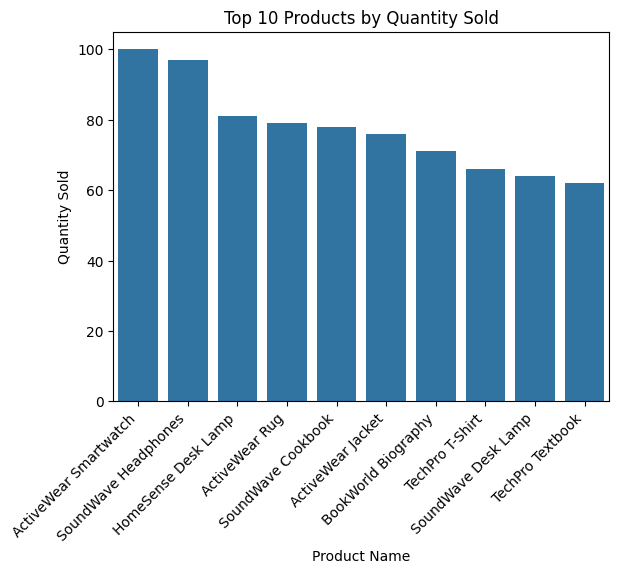

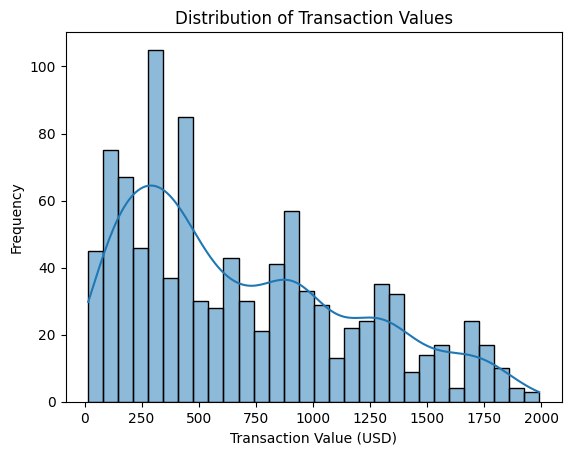


Top 10 Product Categories by Total Sales Value:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


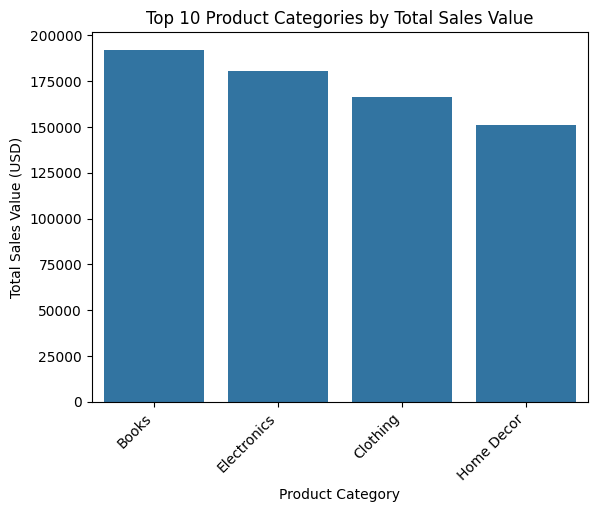


Top 10 Customers by Total Purchase Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


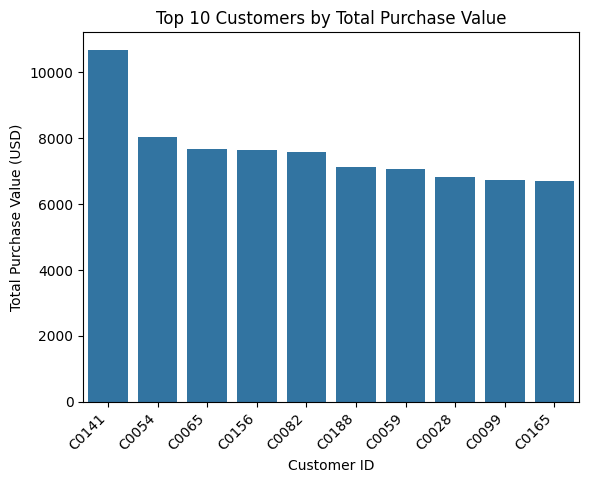


Number of Transactions by Region:
Region
Asia             218
Europe           234
North America    244
South America    304
Name: TransactionID, dtype: int64


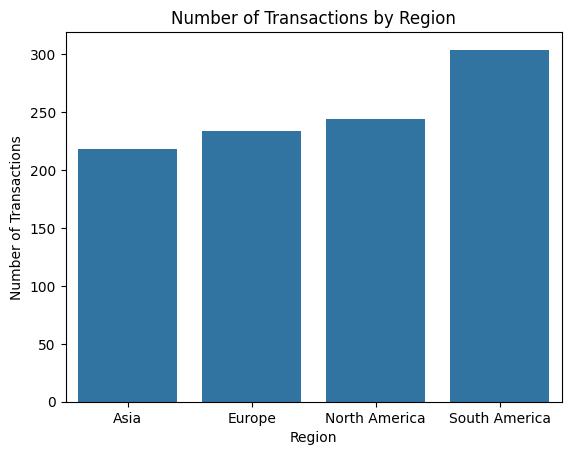

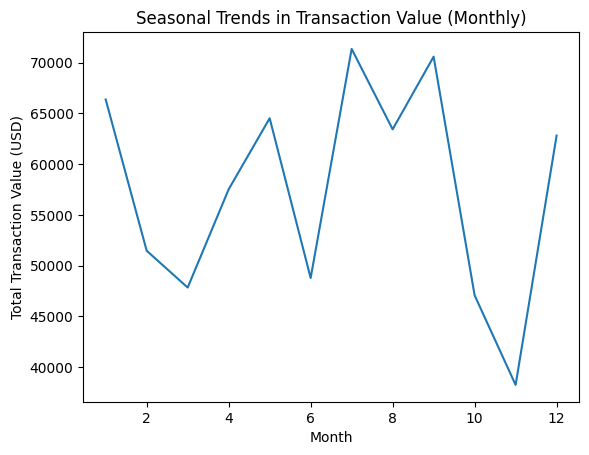

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Data summary
print("Customers Data:")
print(customers.info())
print("\nProducts Data:")
print(products.info())
print("\nTransactions Data:")
print(transactions.info())

# Data Cleaning: Check for missing values and duplicates
print("\nMissing values:")
print(merged_data.isnull().sum())

# Insight 1: Top 10 Products by Quantity Sold
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(product_sales)

# Visualization for Insight 1
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight 2: Distribution of Transaction Values
sns.histplot(merged_data['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Insight 3: Top 10 Product Categories by Total Sales Value
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Product Categories by Total Sales Value:")
print(category_sales)

# Visualization for Insight 3
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Top 10 Product Categories by Total Sales Value')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight 4: Top 10 Customers by Total Purchase Value
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Purchase Value:")
print(top_customers)

# Visualization for Insight 4
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Total Purchase Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Value (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight 5: Number of Transactions by Region
region_transactions = merged_data.groupby('Region')['TransactionID'].count()
print("\nNumber of Transactions by Region:")
print(region_transactions)

# Visualization for Insight 5
sns.barplot(x=region_transactions.index, y=region_transactions.values)
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()

# Insight 6: Seasonal Trends in Transaction Values (Monthly)
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.month
monthly_transactions = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

# Visualization for Insight 6
sns.lineplot(x=monthly_transactions.index, y=monthly_transactions.values)
plt.title('Seasonal Trends in Transaction Value (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value (USD)')
plt.show()


